<a href="https://colab.research.google.com/github/poonmanz/portfolio/blob/main/LinearWeather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(119040, 31)
                 STA  WindGustSpd        MaxTemp  ...  RHN  RVG  WTE
count  119040.000000   532.000000  119040.000000  ...  0.0  0.0  0.0
mean    29659.435795    37.774534      27.045111  ...  NaN  NaN  NaN
std     20953.209402    10.297808       8.717817  ...  NaN  NaN  NaN
min     10001.000000    18.520000     -33.333333  ...  NaN  NaN  NaN
25%     11801.000000    29.632000      25.555556  ...  NaN  NaN  NaN
50%     22508.000000    37.040000      29.444444  ...  NaN  NaN  NaN
75%     33501.000000    43.059000      31.666667  ...  NaN  NaN  NaN
max     82506.000000    75.932000      50.000000  ...  NaN  NaN  NaN

[8 rows x 24 columns]


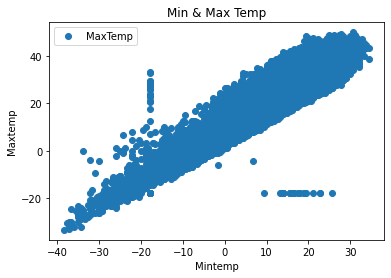

In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/kongruksiamza/MachineLearning/master/Linear%20Regression/Weather.csv")

print(dataset.shape)

print(dataset.describe())

dataset.plot(x = 'MinTemp', y = 'MaxTemp', style = "o")
plt.title('Min & Max Temp')
plt.xlabel("Mintemp")
plt.ylabel("Maxtemp")
plt.show()

In [3]:
# Split data
x = dataset["MinTemp"].values.reshape(-1, 1) # 1D to 2D
y = dataset["MaxTemp"].values.reshape(-1, 1)

# 80% - 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# training
model = LinearRegression()
model.fit(x_train, y_train)

# test
y_pred = model.predict(x_test)

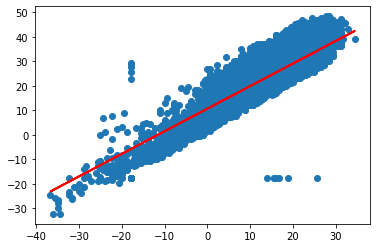

In [4]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color = "red", linewidth = 2)
plt.show()

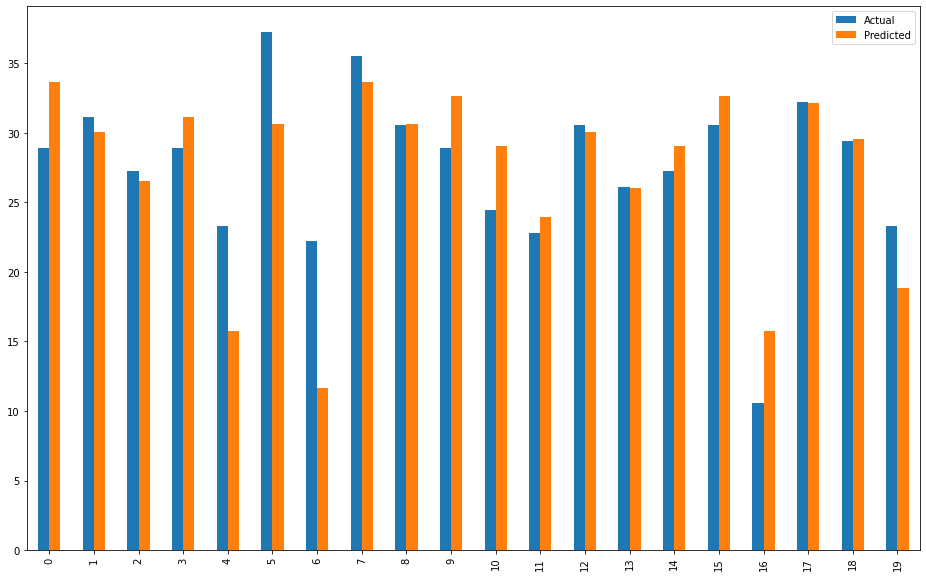

In [5]:
# compare true data & predict data
df = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_pred.flatten()})

df1 = df.head(20)
df1.plot(kind = "bar", figsize = (16, 10))
plt.show()

In [6]:
# score
print("MAE = ",metrics.mean_absolute_error(y_test, y_pred))
print("MSE = ",metrics.mean_squared_error(y_test, y_pred))
print("RMSE = ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Score = ",metrics.r2_score(y_test, y_pred))

MAE =  3.19932917837853
MSE =  17.631568097568447
RMSE =  4.198996082109204
Score =  0.7670218843587764
